# **MScFE 622 STOCHASTIC MODELING - Group Work Project # 2**

# **Step 1**
Each team member works individually collecting 1 financial time series. All the time
series should be from 2 or more different asset classes (e.g. equities, rates, credits,
cryptocurrencies). All the time series should span the years 2019 – 2022. Note that
series need not be prices, but can include returns, volatilities, default probabilities,
yields, etc.

**Answer:**

The teams in charge of risk management, derivatives, and portfolios have determined that more pertinent models are required, especially in view of recent occurrences like the COVID-19 epidemic, so that they can adjust to shifting market conditions. To contribute to this endeavor, each team member has gathered a financial time series from several asset classes that covers the years 2019 to 2022. The intention is to demonstrate the use of regime switching time series models, which are useful for risk and asset management since they can detect changes in market regimes.



**Team Member A**

- Asset: Equities (Microsoft Corporation)
- Time Series: Daily closing prices of Microsoft stock (Ticker: MSFT)
- Data Source: Yahoo Finance
- Start_date = 2019-01-01
- End_date = 2022-09-30

One of the top tech companies, Microsoft Corporation, is traded on the NASDAQ stock exchange. A thorough understanding of Microsoft's performance in the equity market over the designated period can be obtained from the company's daily closing prices. We can learn more about the dynamics of the technology industry and how it influences more general market trends by examining this time series.

In [ ]:
!pip install ccxt


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
from tabulate import tabulate
import yfinance as yf

In [5]:
tickers = ['MSFT']

start_date = '2019-01-01'
end_date = '2022-12-31'

equity_returns = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Returns'] = data['Adj Close'].pct_change()
    equity_returns[ticker] = data['Returns']

equity_returns = equity_returns.dropna()

print(equity_returns.head())
equity_returns.to_csv('equityReturns_data.csv')

[*********************100%%**********************]  1 of 1 completed

                MSFT
Date                
2019-01-03 -0.036788
2019-01-04  0.046509
2019-01-07  0.001275
2019-01-08  0.007251
2019-01-09  0.014300


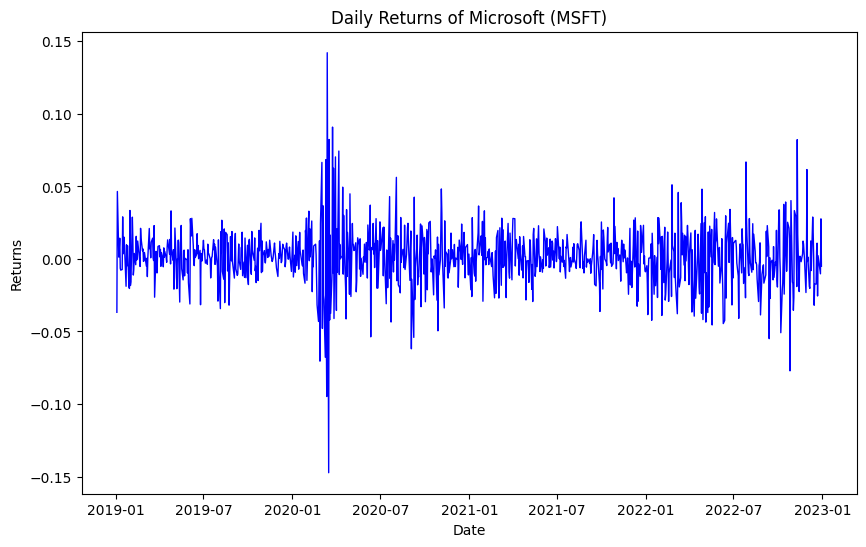

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(equity_returns.index, equity_returns['MSFT'], color='blue', linewidth=1)
plt.title('Daily Returns of Microsoft (MSFT)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

**Team Member B**
- Asset: Russian Ruble (RUB) to US Dollar (USD) exchange rate
- Time Series: Closing price of the RUB-USDT trading pair
- Data Source: OHLCV data (Open, High, Low, Close, Volume)
- Start_date = 2019-01-01
- End_date = 2022-09-30

One of the most important measures of the strength of the Russian economy in comparison to the US economy is the RUB-USD exchange rate. Changes in oil prices, economic sanctions, and geopolitical tensions are a few of the variables that might cause fluctuations in this exchange rate. We can evaluate the dynamics of the foreign exchange market and the effect of outside events on currency valuations by looking at its closing prices.

In [6]:
Ex_rate_ticker = 'RUBUSD=X'

Ex_rate_data = yf.download(Ex_rate_ticker, start=start_date, end=end_date)['Adj Close']

print("Ex Rate Data:")
print(Ex_rate_data.head())

Ex_rate_data.to_csv('Ex_rate_data.csv')

[*********************100%%**********************]  1 of 1 completed

Ex Rate Data:
Date
2019-01-01    0.014456
2019-01-02    0.014515
2019-01-03    0.014487
2019-01-04    0.014522
2019-01-07    0.014800
Name: Adj Close, dtype: float64


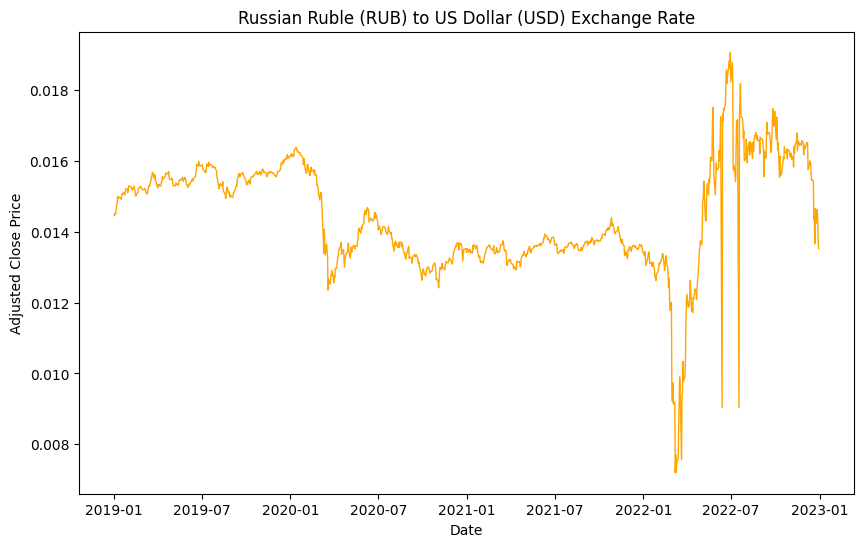

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(Ex_rate_data.index, Ex_rate_data, color='orange', linewidth=1)
plt.title('Russian Ruble (RUB) to US Dollar (USD) Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

**Team Member C**
- Asset Class: Cryptocurrencies
- Time Series: Bitcoin (BTC) daily returns
- Data Source: Cryptocurrency exchange API or financial data provider
- Start_date = 2019-01-01
- End_date = 2022-09-30

Both traders and investors have shown a great deal of interest in Bitcoin, the main cryptocurrency. The daily returns on it offer important insights into the speculative and volatile nature of the bitcoin industry. By examining Bitcoin returns, we may investigate the special qualities of digital assets and how they fit into varied investment portfolios.

In [7]:
crypto_ticker = 'BTC-USD'

start_date = '2019-01-01'
end_date = '2022-09-30'

# Collect the financial time series data using Yahoo Finance API
crypto_data = yf.download(crypto_ticker, start=start_date, end=end_date)['Adj Close']

crypto_returns = crypto_data.pct_change().dropna()

print("Cryptocurrency Returns:")
print(crypto_returns.head())

crypto_returns.to_csv('crypto_returns.csv')


[*********************100%%**********************]  1 of 1 completed

Cryptocurrency Returns:
Date
2019-01-02    0.025989
2019-01-03   -0.027050
2019-01-04    0.005467
2019-01-05   -0.003246
2019-01-06    0.060189
Name: Adj Close, dtype: float64


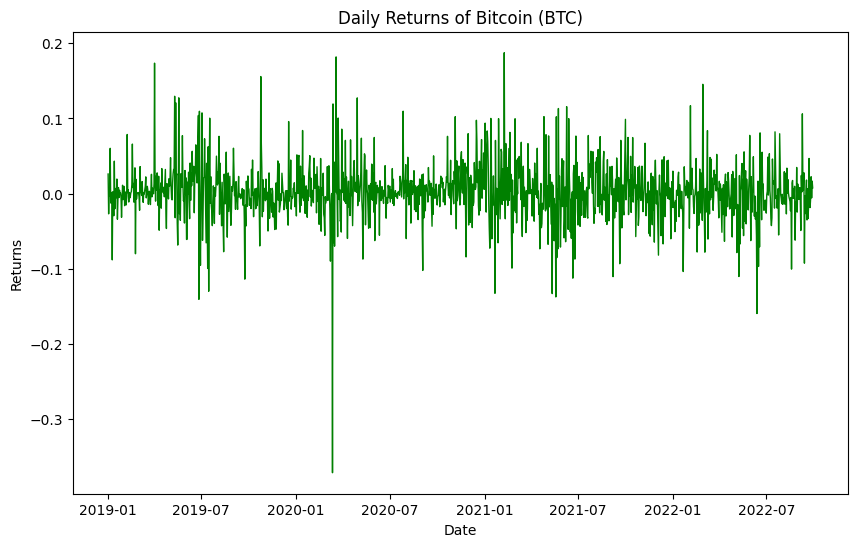

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(crypto_returns.index, crypto_returns, color='green', linewidth=1)
plt.title('Daily Returns of Bitcoin (BTC)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

# **Step 2**

**a.** All team members collaborate to produce visualizations of the series. In
particular, the graphs show any regime changes in the series. Since the data
bookends the COVID pandemic, there are likely going to be several regimes in the
series. Students will identify the approximate dates of the regimes, and the levels of the series. The group then decides on 1 series to model.

In [8]:
import datetime
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import norm

In [55]:
start_date= datetime.date(2019, 9, 1)
end_date = datetime.date(2022, 9, 30)
ticker = ['MSFT','RUBUSD=X', 'BTC-USD']
df = pd.DataFrame()
timedata = yf.download(ticker, start=start_date, end=end_date, interval="1d")
timedata.index = timedata.index.date
df[ticker] = timedata['Adj Close']


[*********************100%%**********************]  3 of 3 completed


In [56]:
df.dropna(inplace=True)
df = df.pct_change(axis=0)

In [57]:

df.dropna(inplace=True)
df.head()

,MSFT,RUBUSD=X,BTC-USD
2019-09-04,-0.002734,0.011688,0.000166
2019-09-05,-0.001790,0.017583,0.008377
2019-09-06,-0.021014,-0.006783,0.000364
2019-09-09,-0.001770,-0.011359,0.006214
2019-09-10,-0.021190,-0.010471,0.003721


Plotting the mean of the daily percentage increases for each asset across the whole period is how we start. An overview of the average returns for the various asset classes is given by the plot.

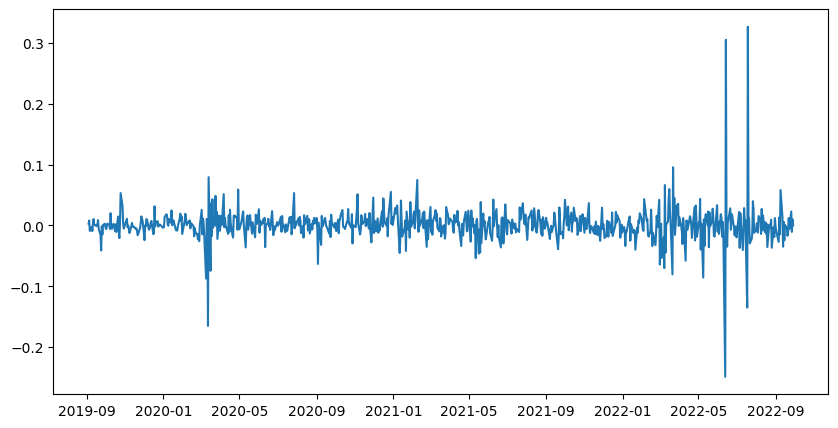

In [12]:

plt.figure(figsize=(10,5))
plt.plot(df.index, df.mean(axis=1))
plt.show()

For each asset separately, we display the daily percentage changes (returns). The graphic illustrates how returns vary over time, emphasizing times of stability or volatility. Every line denotes a distinct asset, such as stocks, money, or cryptocurrency.

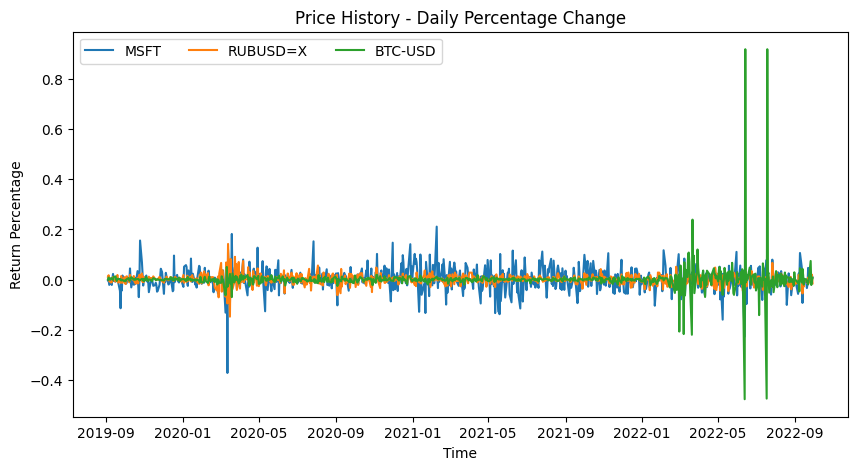

In [13]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df)
plt.legend(ticker, loc='upper left', ncol=3)
plt.title("Price History - Daily Percentage Change")
plt.xlabel("Time")
plt.ylabel("Return Percentage")
plt.show();

The standard deviation of daily returns for all assets is then computed and plotted. Each asset's volatility is depicted in this graphic; larger standard deviations denote more price swings.

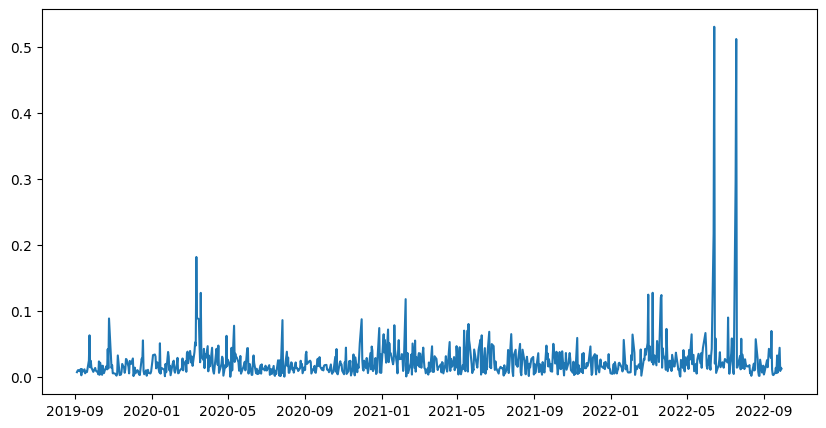

In [14]:
df = df.std(axis=1)
df = df.dropna(axis=0)
plt.figure(figsize = (10, 5))
plt.plot(df.index, df)
plt.show()

We plot a histogram of the standardized returns in order to examine the distribution of returns in more detail. The process of standardization entails changing the returns' mean and standard deviation to 0 and 1, respectively. The frequency and distribution of returns are revealed by the histogram.

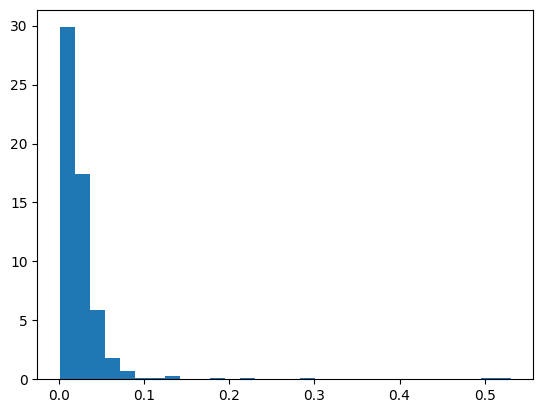

In [15]:

count, bins, ignored = plt.hist(df, 30, density=True)

Applying the natural logarithm transformation and then visualizes the transformed data as a line plot. We visualize the resulting time series using the logarithm of the standardized returns. This modification makes it easier to analyze the data and helps to stabilize the variance of the results.

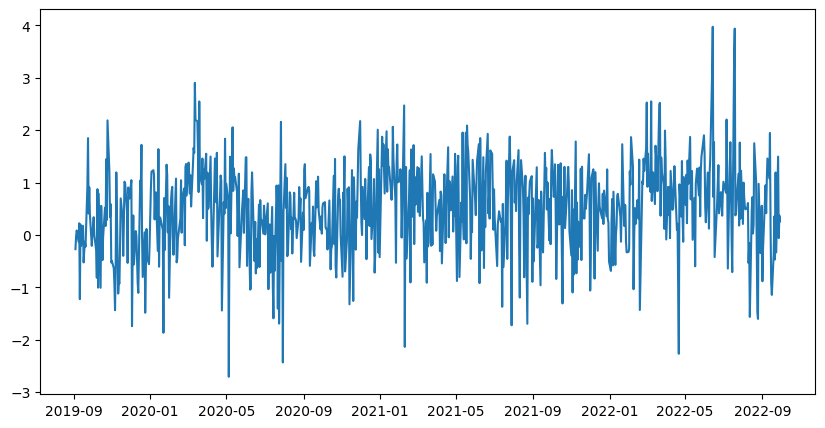

In [16]:
df = np.log(100* df)
plt.figure(figsize=(10, 5))
plt.plot(df.index, df)
plt.show()

The Histogram shows how the data points are distributed, giving information about the density and frequency within certain intervals.

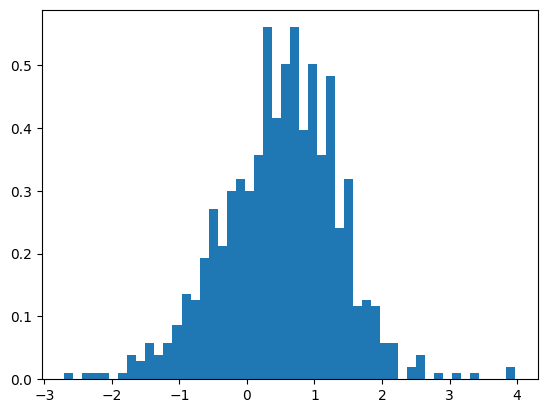

In [17]:
count, bins, ignored = plt.hist(df, 50, density=True)
plt.show()

The team has selected to model the RUB-USD exchange rate series after considering and evaluating each member's visualizations of the financial time series. This choice was made in light of the factor that the team feels by modeling the RUB-USD exchange rate series, important insights will be obtained and the goals of the risk management, derivatives management, and portfolio management teams will be greatly advanced. As a result, everyone in the group has decided to concentrate on modeling the RUB-USD exchange rate series utilizing regime switching time series models for additional analysis and modeling.

# **Step 2b**

All team members collaborate to Estimate a Markov-regime switching model for
the selected financial time series. Estimate the model under different
assumptions:
i. Different number of states.

**ii.** Allowing the expected realization of the time series to differ across states
(different “mus”), but with constant variance (same “sigma”).
iii. Allowing the variance of the time series to change across states (different
“sigmas”), but with constant expectation (same “mu”).
iv. Allowing for different expectations and variances across states.

**Answer:**



In [18]:
Ex_rate_data = pd.read_csv('Ex_rate_data.csv', index_col='Date', parse_dates=True, date_format='%Y-%m-%d')
Ex_rate_data = Ex_rate_data.rename(columns={'Adj Close': 'Adj_Close'})
Rub_Usd = Ex_rate_data
Rub_Usd.groupby(pd.PeriodIndex(Rub_Usd.index, freq="M"))['Adj_Close'].mean()
Rub_Usd.sort_index(inplace=True)
#Rub_Usd = Rub_Usd[['Adj_Close']].to_numpy()

<Axes: title={'center': 'RUB/USD MoM Change'}, xlabel='Date'>

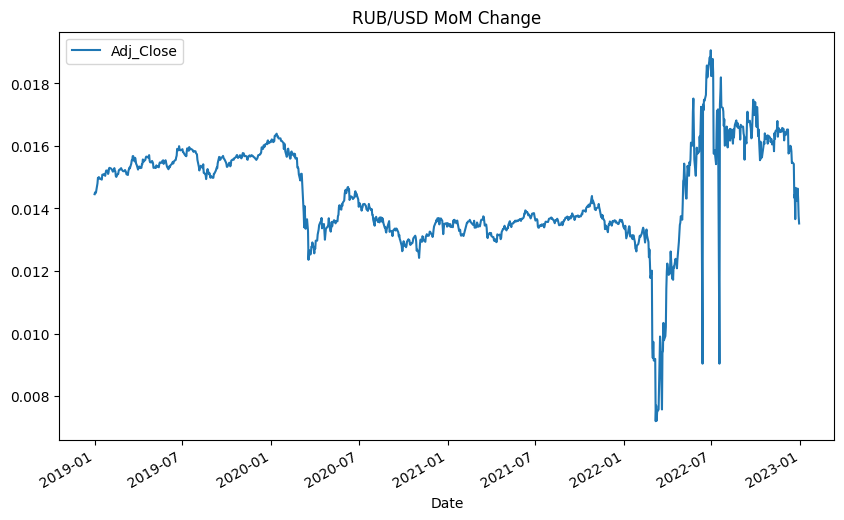

In [19]:
Rub_Usd.plot(figsize=(10, 6), title='RUB/USD MoM Change')

In [20]:
Rub_Usd_model = sm.tsa.MarkovRegression(endog=Rub_Usd, trend='c',k_regimes=2)
Rub_Usd_model = Rub_Usd_model.fit(iter=1000)
Rub_Usd_model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: iter. After release 0.14, this will raise.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                 1043
Model:               MarkovRegression   Log Likelihood                5786.502
Date:                Mon, 29 Apr 2024   AIC                         -11563.005
Time:                        23:41:14   BIC                         -11538.255
Sample:                             0   HQIC                        -11553.617
                               - 1043                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0133   3.83e-05    346.811      0.000       0.013       0.013
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0158   4.24e-05    373.966      0.000       0.016       0.016
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.248e-07   7.72e-08     10.681      0.000    6.73e-07    9.76e-07
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9938      0.003    311.701      0.000       0.988       1.000
p[1->0]        0.0075      0.004      1.923      0.055      -0.000       0.015
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [21]:
print(Rub_Usd_model.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}   &    Adj\_Close    & \textbf{  No. Observations:  } &    1043     \\
\textbf{Model:}           & MarkovRegression & \textbf{  Log Likelihood     } &  5786.502   \\
\textbf{Date:}            & Mon, 29 Apr 2024 & \textbf{  AIC                } & -11563.005  \\
\textbf{Time:}            &     23:41:15     & \textbf{  BIC                } & -11538.255  \\
\textbf{Sample:}          &        0         & \textbf{  HQIC               } & -11553.617  \\
\textbf{}                 &      - 1043      & \textbf{                     } &             \\
\textbf{Covariance Type:} &      approx      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{const} &       0.0133  &     3.83e-05     &   346.811  &         0.000        &        0.013    

<Axes: title={'center': 'Probability of being in the low regime'}, xlabel='Date'>

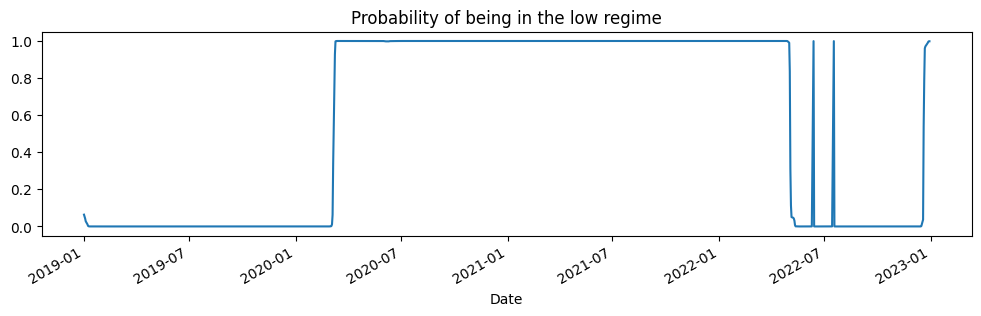

In [22]:
Rub_Usd_model.smoothed_marginal_probabilities[0].plot(
    title="Probability of being in the low regime", figsize=(12, 3)
)

<Axes: title={'center': 'Probability of being in the high regime'}, xlabel='Date'>

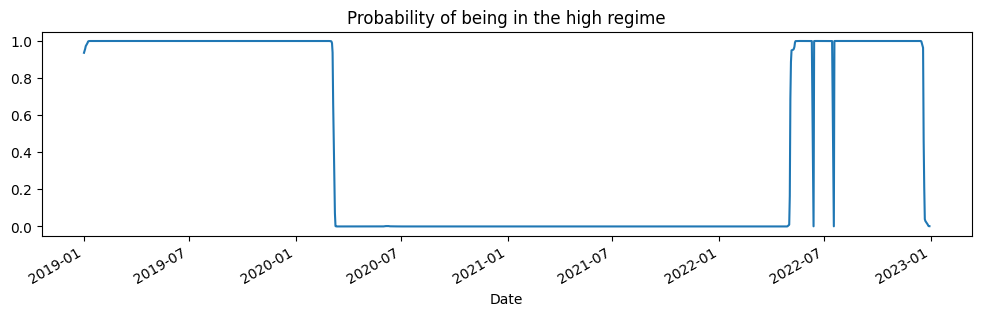

In [23]:
Rub_Usd_model.smoothed_marginal_probabilities[1].plot(
    title="Probability of being in the high regime", figsize=(12, 3)
)

## **Switching Trend (Different Mean)**

In [24]:
Rub_Usd_model_switch_trend = sm.tsa.MarkovRegression(endog = Rub_Usd, trend='n',k_regimes=2, switching_trend=True)
Rub_Usd_model_switch_trend = Rub_Usd_model_switch_trend.fit(iter=1000)
Rub_Usd_model_switch_trend.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: iter. After release 0.14, this will raise.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                 1043
Model:               MarkovRegression   Log Likelihood                2934.189
Date:                Mon, 29 Apr 2024   AIC                          -5862.379
Time:                        23:41:16   BIC                          -5847.529
Sample:                             0   HQIC                         -5856.746
                               - 1043                                         
Covariance Type:               approx                                         
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   9.23e-06     22.836      0.000       0.000       0.000
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.5000         -0       -inf      0.000       0.500       0.500
p[1->0]        0.5000         -0       -inf      0.000       0.500       0.500
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [25]:
print(Rub_Usd_model_switch_trend.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}   &    Adj\_Close    & \textbf{  No. Observations:  } &    1043     \\
\textbf{Model:}           & MarkovRegression & \textbf{  Log Likelihood     } &  2934.189   \\
\textbf{Date:}            & Mon, 29 Apr 2024 & \textbf{  AIC                } & -5862.379   \\
\textbf{Time:}            &     23:41:16     & \textbf{  BIC                } & -5847.529   \\
\textbf{Sample:}          &        0         & \textbf{  HQIC               } & -5856.746   \\
\textbf{}                 &      - 1043      & \textbf{                     } &             \\
\textbf{Covariance Type:} &      approx      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{sigma2} &       0.0002  &     9.23e-06     &    22.836  &         0.000        &        0.000  

### **Switching Variance**

In [26]:
Rub_Usd_model_switch_variance = sm.tsa.MarkovRegression(endog = Rub_Usd, trend='n',k_regimes=2, switching_variance=True)
Rub_Usd_model_switch_variance = Rub_Usd_model_switch_variance.fit(iter=1000)
Rub_Usd_model_switch_variance.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: iter. After release 0.14, this will raise.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                 1043
Model:               MarkovRegression   Log Likelihood                2934.189
Date:                Mon, 29 Apr 2024   AIC                          -5860.379
Time:                        23:41:16   BIC                          -5840.579
Sample:                             0   HQIC                         -5852.869
                               - 1043                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   7.32e-12   2.88e+07      0.000       0.000       0.000
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   9.23e-06     22.836      0.000       0.000       0.000
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]     9.988e-21     56.219   1.78e-22      1.000    -110.187     110.187
p[1->0]     9.988e-21   1.03e-08   9.69e-13      1.000   -2.02e-08    2.02e-08
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 3.12e+40. Standard errors may be unstable.
"""

In [27]:
print(Rub_Usd_model_switch_variance.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}   &    Adj\_Close    & \textbf{  No. Observations:  } &    1043     \\
\textbf{Model:}           & MarkovRegression & \textbf{  Log Likelihood     } &  2934.189   \\
\textbf{Date:}            & Mon, 29 Apr 2024 & \textbf{  AIC                } & -5860.379   \\
\textbf{Time:}            &     23:41:16     & \textbf{  BIC                } & -5840.579   \\
\textbf{Sample:}          &        0         & \textbf{  HQIC               } & -5852.869   \\
\textbf{}                 &      - 1043      & \textbf{                     } &             \\
\textbf{Covariance Type:} &      approx      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{sigma2} &       0.0002  &     7.32e-12     &  2.88e+07  &         0.000        &        0.000  

## **Switching Variance and Trend**

In [28]:
Rub_Usd_model_switch_variance_and_trend = sm.tsa.MarkovRegression(endog = Rub_Usd, trend='n',k_regimes=2, switching_variance=True, switching_trend=True)
Rub_Usd_model_switch_variance_and_trend = Rub_Usd_model_switch_variance_and_trend.fit(iter=1000)
Rub_Usd_model_switch_variance_and_trend.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method bfgs is: gtol, norm, epsilon. The list of unsupported keyword arguments passed include: iter. After release 0.14, this will raise.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:              Adj_Close   No. Observations:                 1043
Model:               MarkovRegression   Log Likelihood                2934.189
Date:                Mon, 29 Apr 2024   AIC                          -5860.379
Time:                        23:41:17   BIC                          -5840.579
Sample:                             0   HQIC                         -5852.869
                               - 1043                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   7.32e-12   2.88e+07      0.000       0.000       0.000
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   9.23e-06     22.836      0.000       0.000       0.000
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]     9.988e-21     56.219   1.78e-22      1.000    -110.187     110.187
p[1->0]     9.988e-21   1.03e-08   9.69e-13      1.000   -2.02e-08    2.02e-08
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 3.12e+40. Standard errors may be unstable.
"""

In [29]:
print(Rub_Usd_model_switch_variance_and_trend.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}   &    Adj\_Close    & \textbf{  No. Observations:  } &    1043     \\
\textbf{Model:}           & MarkovRegression & \textbf{  Log Likelihood     } &  2934.189   \\
\textbf{Date:}            & Mon, 29 Apr 2024 & \textbf{  AIC                } & -5860.379   \\
\textbf{Time:}            &     23:41:17     & \textbf{  BIC                } & -5840.579   \\
\textbf{Sample:}          &        0         & \textbf{  HQIC               } & -5852.869   \\
\textbf{}                 &      - 1043      & \textbf{                     } &             \\
\textbf{Covariance Type:} &      approx      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{sigma2} &       0.0002  &     7.32e-12     &  2.88e+07  &         0.000        &        0.000  

# **Step 3**
Individually, each team member compares the performance of each model using
standard information criteria from the estimates of the likelihood (Akaike, Schwarz...).

a. Member A will compare the models that had different mu values.

b. Member B will compare the models that had different sigma values.

c. Member C will compare the models that had different expectations and
variances.

d. All members collaborate on combining the results and ranking the models from
best to worst.

In [30]:
Rub_Usd = Rub_Usd[['Adj_Close']].to_numpy()

In [31]:
from scipy.stats import norm
from tabulate import tabulate

import numpy as np
from scipy.stats import norm

def likelihood(xi_prob, mu, sigma, y):
    phi = norm.pdf((y - mu) / sigma)
    y_like = np.dot(xi_prob, phi)
    return y_like


# Hamilton filtering
def likelihood(xi_prob, mu, sigma, y):
    phi = norm.pdf((y - mu) / sigma)
    y_like = np.dot(xi_prob, phi)
    return y_like


# Hamilton filtering
def forward_alg(pi_hat0, N, T, P, mu, sigma, Y):
    xi_prob_t = np.zeros((T, N))
    xi_prob_t1 = np.zeros((T, N))

    # Case t=1
    y_like = likelihood(pi_hat0, mu, sigma, Y[0])
    for ss in range(0, N):
        phi = np.zeros((N))
        for ss2 in range(0, N):
            phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
    xi_prob_t[0, :] = np.multiply(pi_hat0, phi) / y_like
    for ss in range(0, N):
        xi_prob_t1[0, ss] = np.dot(P[:, ss], xi_prob_t[0, :])

    for tt in range(1, T):
        y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
        for ss in range(0, N):
            phi = np.zeros((N))
            for ss2 in range(0, N):
                phi[ss2] = norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2])
        xi_prob_t[tt, :] = np.multiply(xi_prob_t1[tt - 1, :], phi) / y_like
        for ss in range(0, N):
            xi_prob_t1[tt, ss] = np.dot(P[:, ss], xi_prob_t[tt, :])

    return xi_prob_t, xi_prob_t1


# Kim filtering
def backward_alg(xi_prob_t, xi_prob_t1, N, T, P, mu, sigma, Y):
    xi_prob_T = np.zeros((T, N))
    xi_prob_T[T - 1, :] = xi_prob_t[T - 1, :]

    for tt in range(T - 2, -1, -1):
        xi_T_xi = np.divide(xi_prob_T[tt + 1, :], xi_prob_t1[tt, :])
        for ss in range(0, N):
            xi_prob_T[tt, ss] = xi_prob_t[tt, ss] * np.dot(P[ss, :], xi_T_xi)

    return xi_prob_T  # , xi_prob_T1


def M_step_func(xi_prob, P, N, T, Y):  #
    mu_hat = np.zeros((N))
    sigma_hat = np.zeros((N))
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros((N))

    for ss in range(0, N):
        xi_y = np.dot(xi_prob[:, ss], Y)
        mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])

        xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat[ss]) ** 2)
        sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5

        for ss2 in range(0, N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(
                P[ss, :, 1:]
            )  # /np.sum(xi_prob[0:T-1,ss]) #np.sum(P[ss,:,1:T])
            # print( np.sum(xi_prob[0:T-1,ss]), np.sum(P[ss,:,1:T]))

        pi_hat[ss] = xi_prob[0, ss]

    return mu_hat, sigma_hat, P_hat, pi_hat

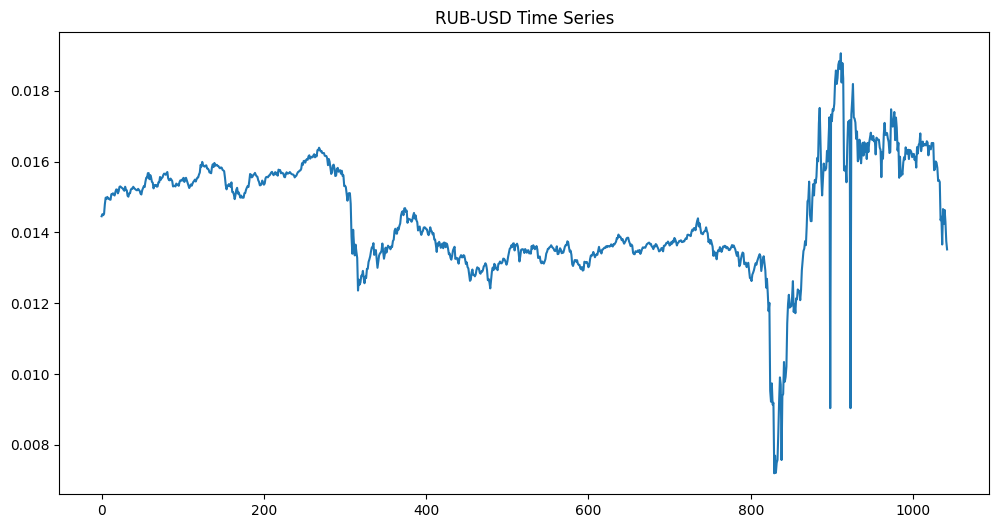

In [32]:
plt.plot(Rub_Usd)
plt.title("RUB-USD Time Series")
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

The initial estimates were made based on intuitive approximations about the sample means of each regime in the data.

In [33]:
regime1_mean = Rub_Usd[:200].mean()
regime2_mean = Rub_Usd[200:800].mean()
regime3_mean = 0.010  # This value was provided, assuming it's a constant mean for regime 3

# Calculate regime standard deviations
regime1_sd = Rub_Usd[:200].std()
regime2_sd = Rub_Usd[200:800].std()
regime3_sd = Rub_Usd[1000:1200].std()

print("Regime 1 Mean:", regime1_mean)
print("Regime 2 Mean:", regime2_mean)
print("Regime 3 Mean:", regime3_mean)
print("Regime 1 Standard Deviation:", regime1_sd)
print("Regime 2 Standard Deviation:", regime2_sd)
print("Regime 3 Standard Deviation:", regime3_sd)

Regime 1 Mean: 0.015384199093095914
Regime 2 Mean: 0.013927499796263827
Regime 3 Mean: 0.01
Regime 1 Standard Deviation: 0.00029170456087346437
Regime 2 Standard Deviation: 0.0009471445698805217
Regime 3 Standard Deviation: 0.0009124211403670551


**Initialising the Parameter**

In [34]:
T = len(Rub_Usd)
N = 2

mu_hat0 = np.array([regime1_mean, regime2_mean])
sigma_hat0 = np.array([regime1_sd, regime2_sd])
P_hat0 = np.array([[0.75, 0.25],
                   [0.3, 0.7]])  # Initial transition probabilities
pi_hat0 = np.array([0.5, 0.5])

# Estimate initial probabilities after 100 iterations
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-2


**Constant Standard Deviation, Different Mean**

[0.0153842 0.0139275] [0.0002917  0.00094714] [[0.75 0.25]
 [0.3  0.7 ]] [0.54545455 0.45454545]


<ipython-input-31-452b35239690>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
<ipython-input-31-452b35239690>:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phi[ss2] = norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2])


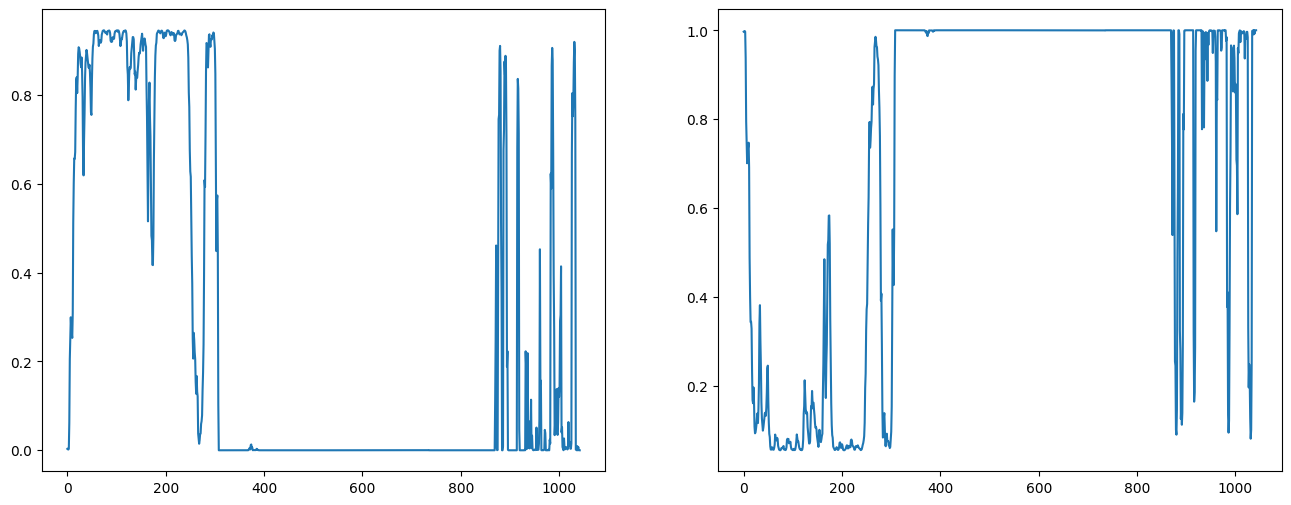


0 3.1356774666656353
[0.01553326 0.01404959] [0.00027758 0.00165056] [[0.88328207 0.11671793]
 [0.0411656  0.9588344 ]] [0.00321247 0.99678753]


<ipython-input-31-452b35239690>:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])
<ipython-input-31-452b35239690>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5


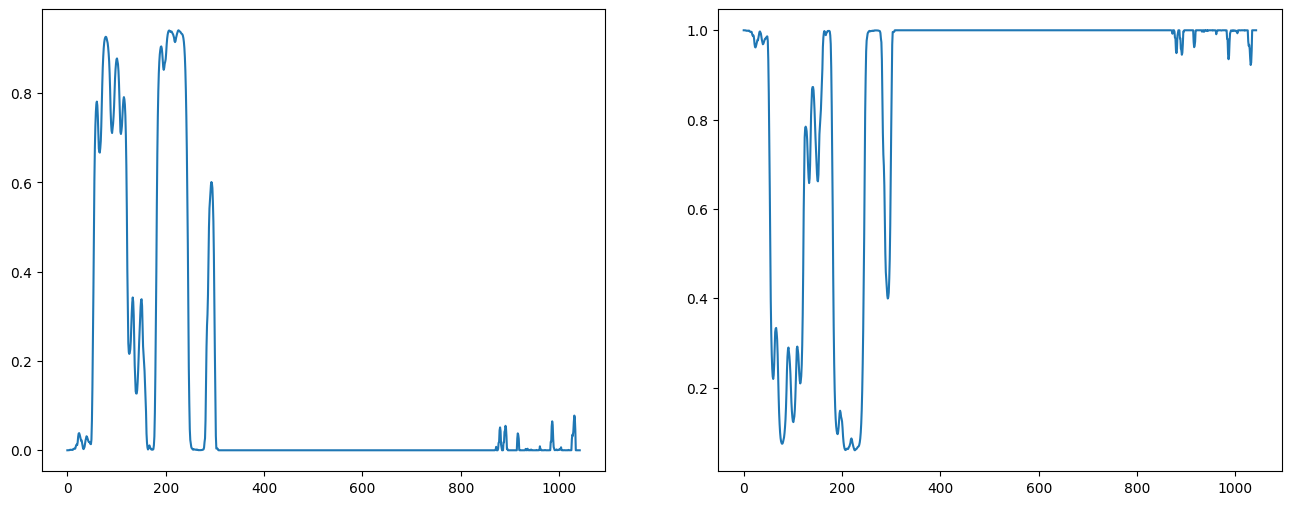


1 4.4871293084077
[0.01556187 0.01427332] [0.00016003 0.00161272] [[0.94295515 0.05704485]
 [0.00825664 0.99174336]] [2.18016087e-07 9.99999782e-01]



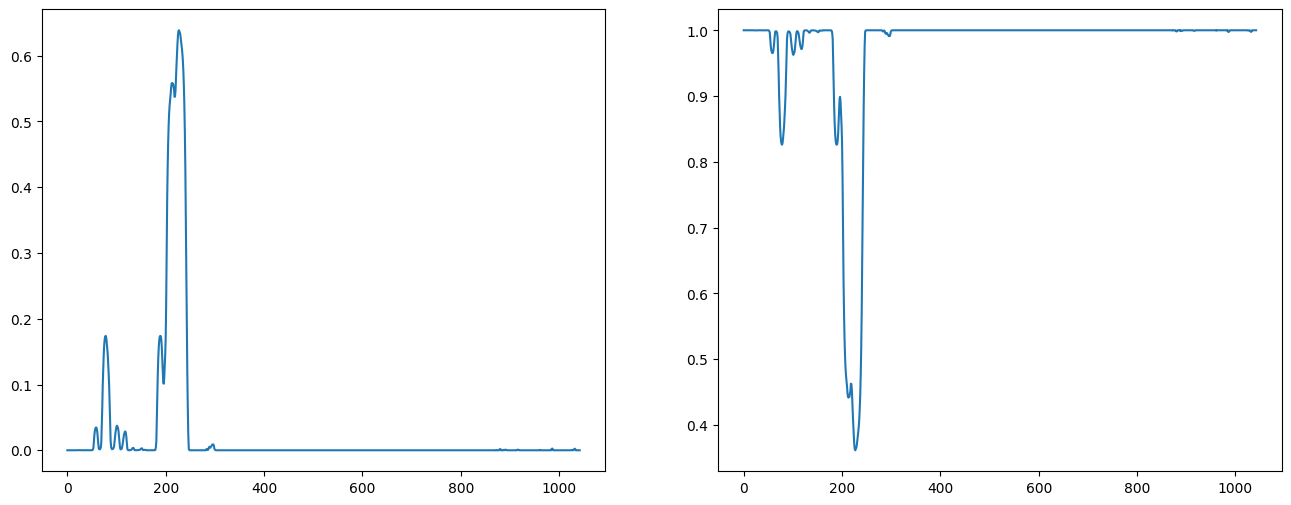


2 2.583999182585676
[0.01562699 0.01440254] [8.59098389e-05 1.57694936e-03] [[0.94699001 0.05300999]
 [0.00149472 0.99850528]] [5.45395864e-19 1.00000000e+00]



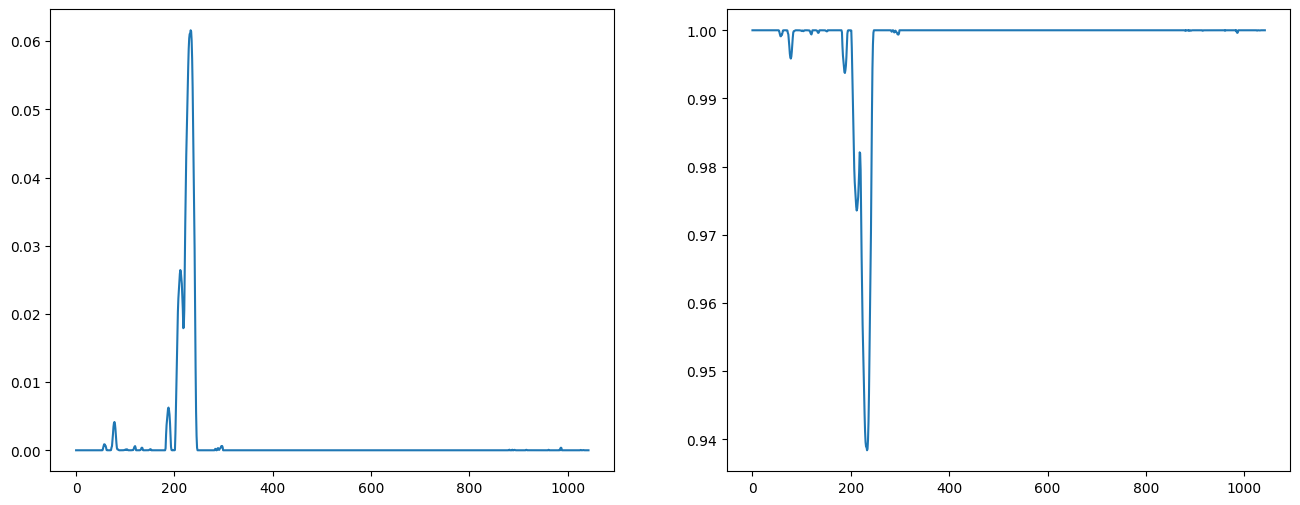


3 39.1823974293901
[0.01564893 0.0144343 ] [5.11352428e-05 1.56851647e-03] [[9.17119653e-01 8.28803465e-02]
 [1.22574099e-04 9.99877426e-01]] [1.37592607e-60 1.00000000e+00]



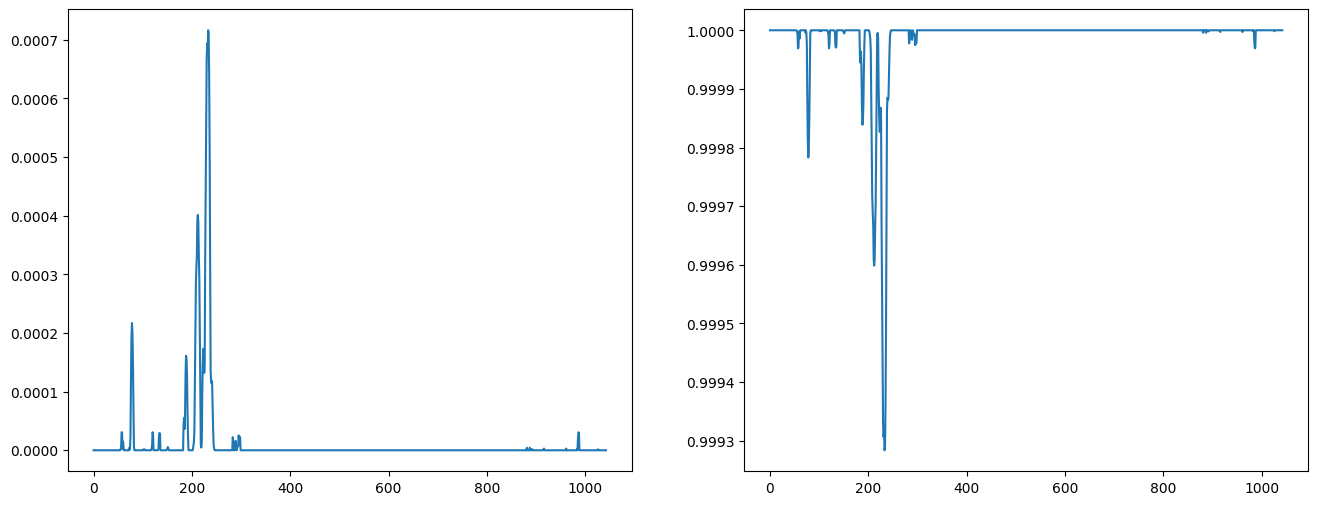


4 1439.8330860498088
[0.01565505 0.01443607] [3.74177191e-05 1.56805748e-03] [[7.57004261e-01 2.42995739e-01]
 [3.19000511e-06 9.99996810e-01]] [8.61770037e-180 1.00000000e+000]



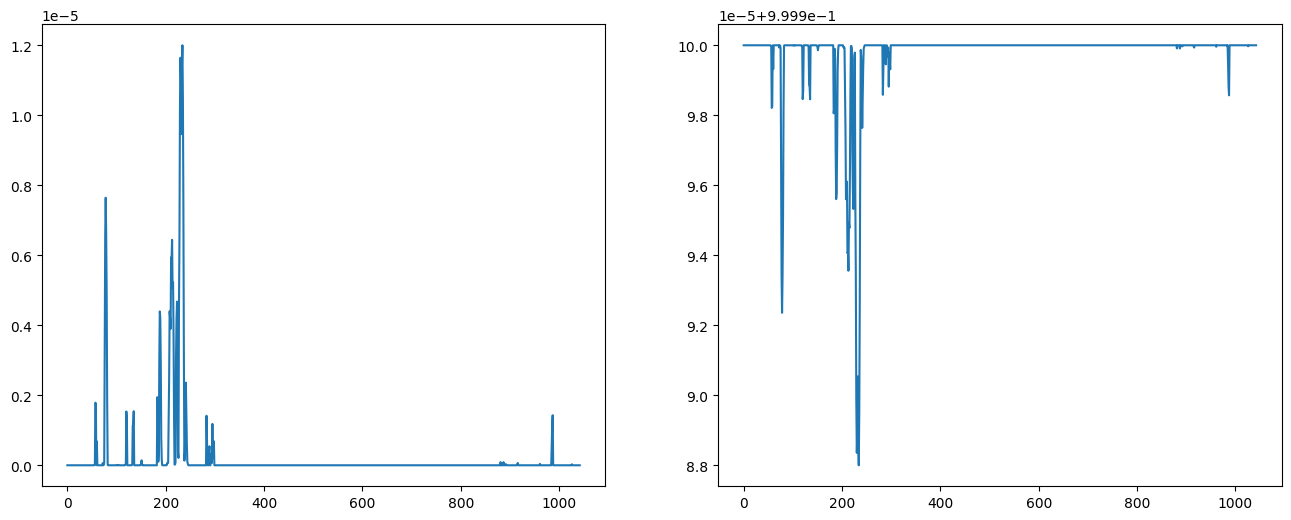


5 3845.1043512420274
[0.01565973 0.01443609] [2.94287969e-05 1.56805349e-03] [[5.58619180e-01 4.41380820e-01]
 [1.02332777e-07 9.99999898e-01]] [0. 1.]



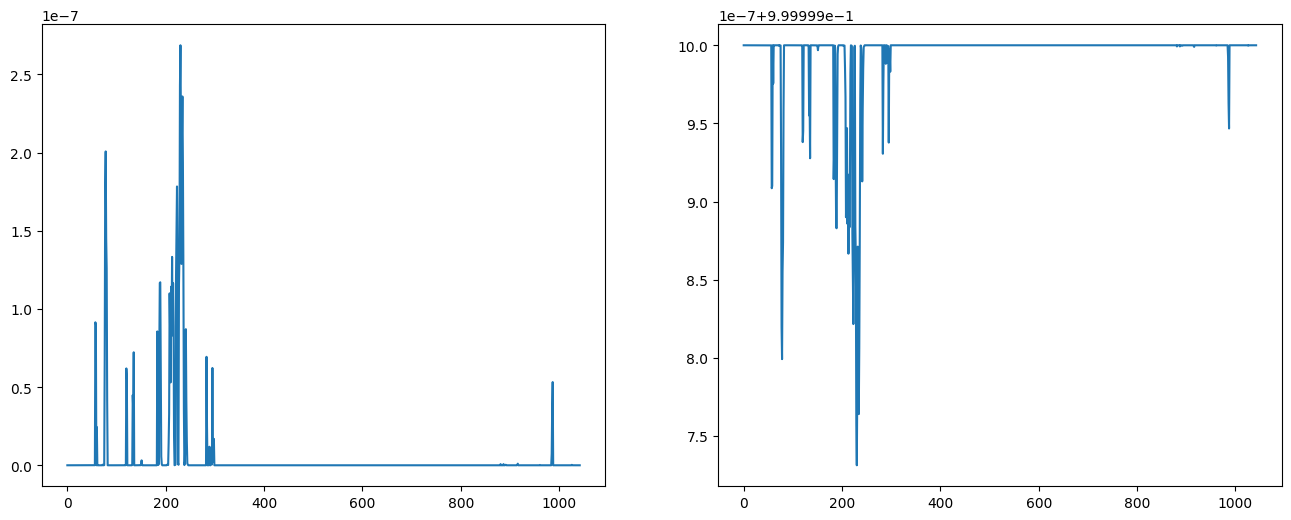


6 3832.718134261453
[0.01566168 0.01443609] [2.53251911e-05 1.56805342e-03] [[3.66787266e-01 6.33212734e-01]
 [3.45773688e-09 9.99999997e-01]] [0. 1.]



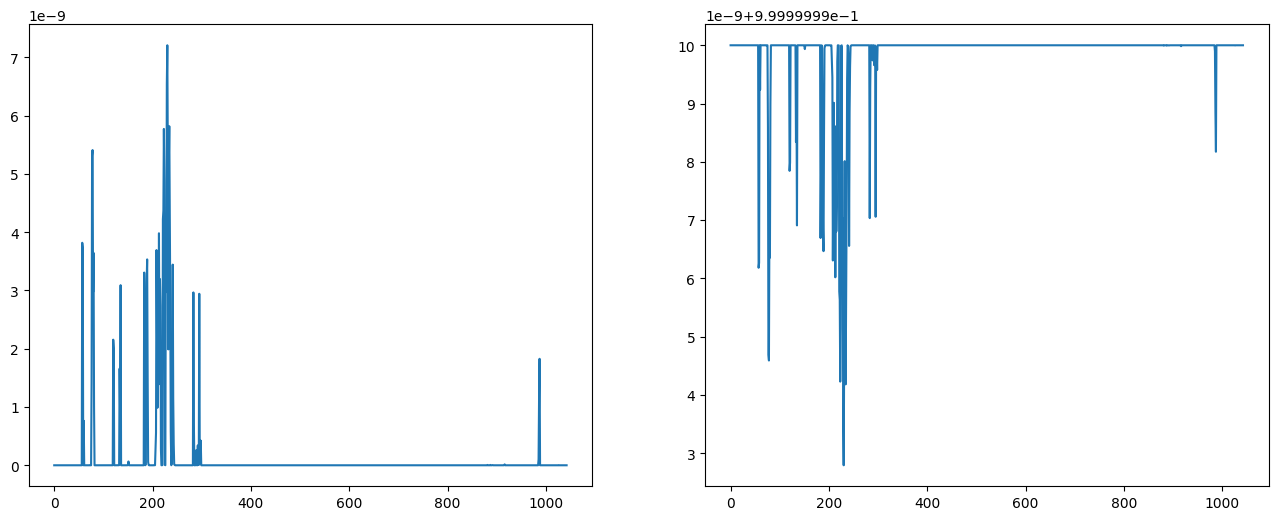


7 2990.766452583693
[0.01566253 0.01443609] [2.27838132e-05 1.56805341e-03] [[2.17243776e-01 7.82756224e-01]
 [1.20481960e-10 1.00000000e+00]] [0. 1.]



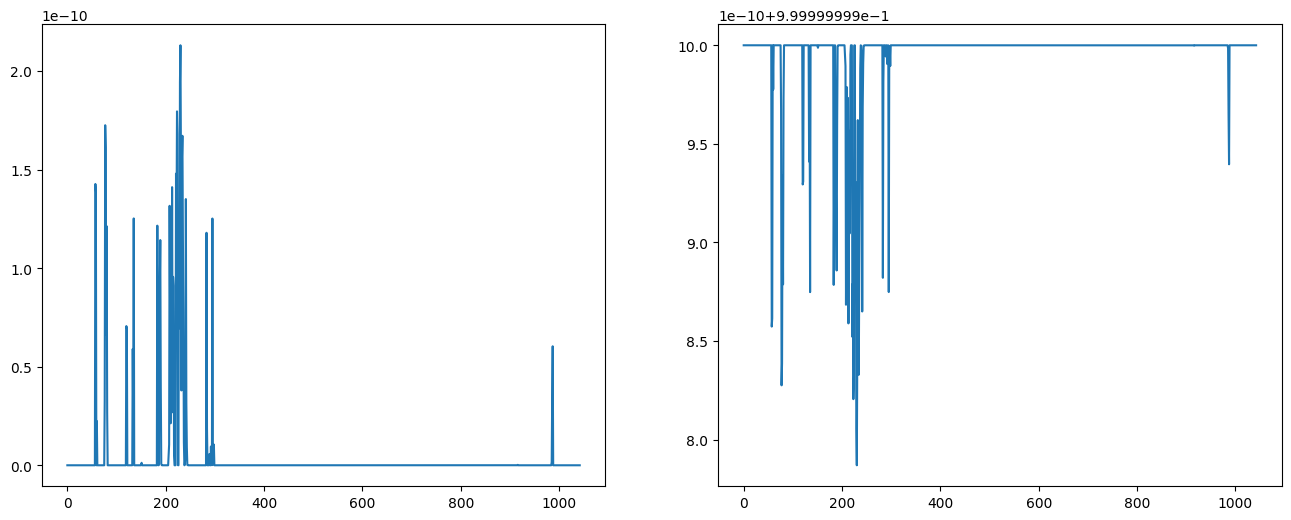


8 1987.6004245533115
[0.01566287 0.01443609] [2.08672234e-05 1.56805341e-03] [[1.17863635e-01 8.82136365e-01]
 [4.22385060e-12 1.00000000e+00]] [0. 1.]



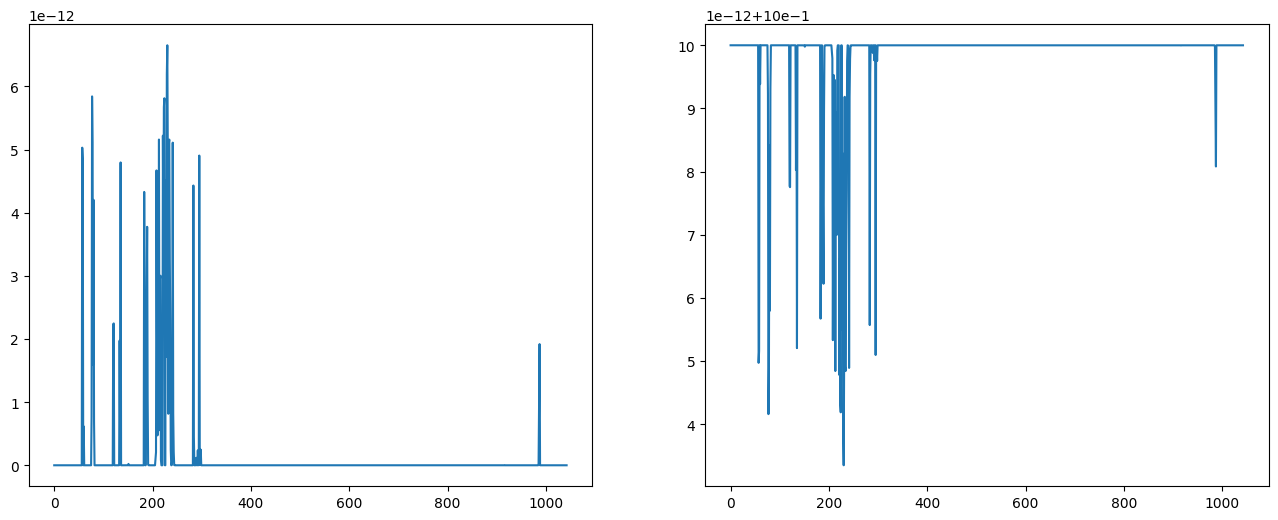


9 1179.1593696757632
[0.01566295 0.01443609] [1.92545936e-05 1.56805341e-03] [[5.89056644e-02 9.41094336e-01]
 [1.45345795e-13 1.00000000e+00]] [0. 1.]



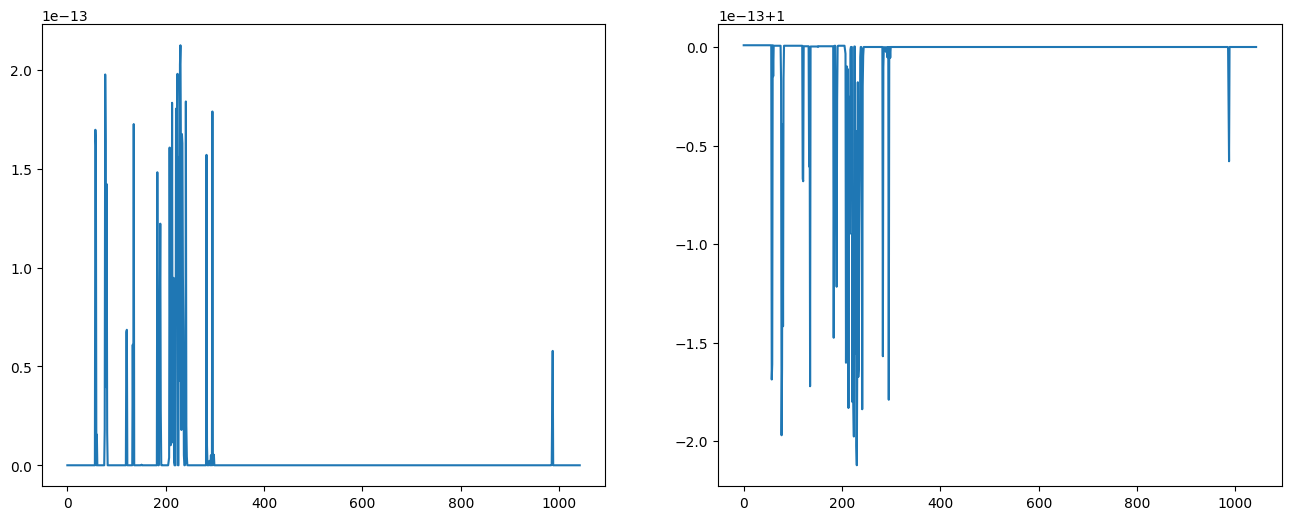


10 634.4983193348354
[0.01566291 0.01443609] [1.78330026e-05 1.56805341e-03] [[2.71807484e-02 9.72819252e-01]
 [4.82106091e-15 1.00000000e+00]] [0. 1.]



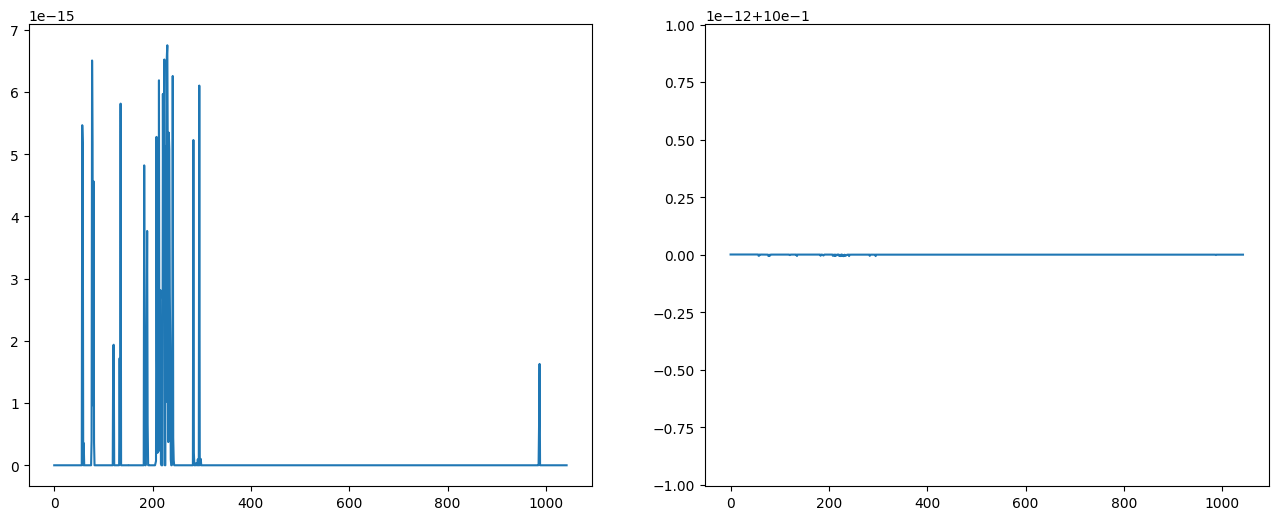


11 311.57002352984586
[0.01566283 0.01443609] [1.65574612e-05 1.56805341e-03] [[1.16022472e-02 9.88397753e-01]
 [1.52347807e-16 1.00000000e+00]] [0. 1.]



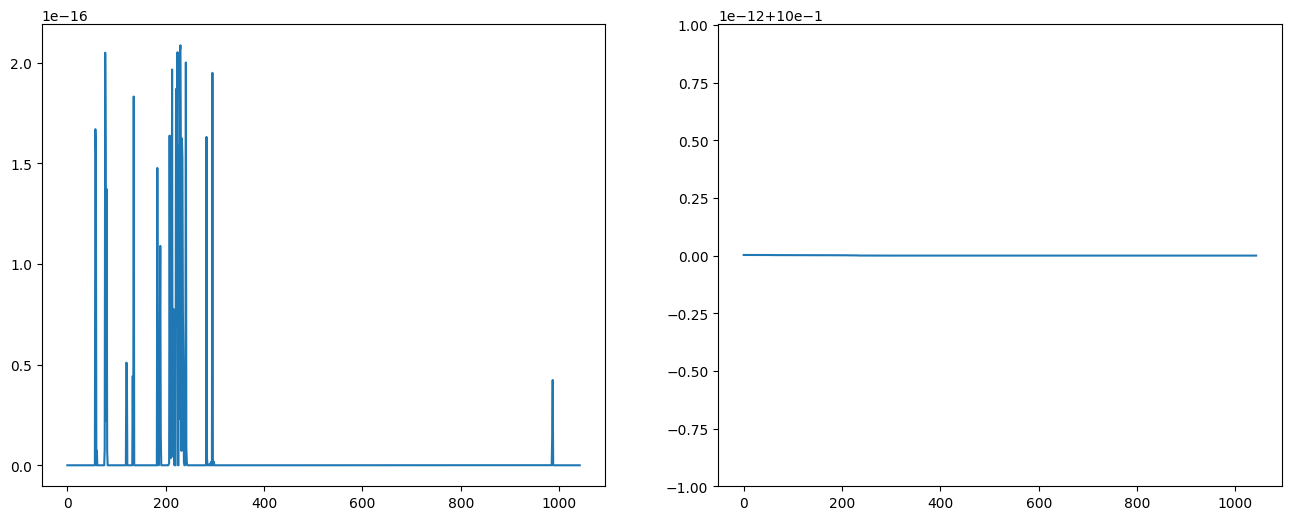


12 140.1322086786393
[0.01566276 0.01443609] [1.54069361e-05 1.56805341e-03] [[4.59563676e-03 9.95404363e-01]
 [4.55575677e-18 1.00000000e+00]] [0. 1.]



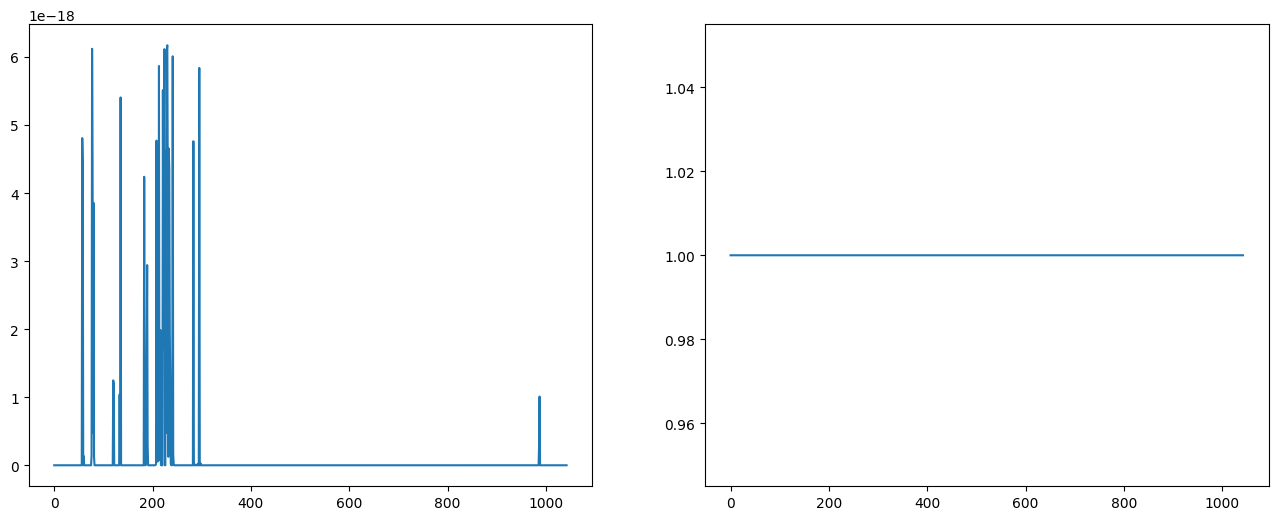


13 57.96695350211484
[0.01566272 0.01443609] [1.43709763e-05 1.56805341e-03] [[1.69728909e-03 9.98302711e-01]
 [1.28517218e-19 1.00000000e+00]] [0. 1.]



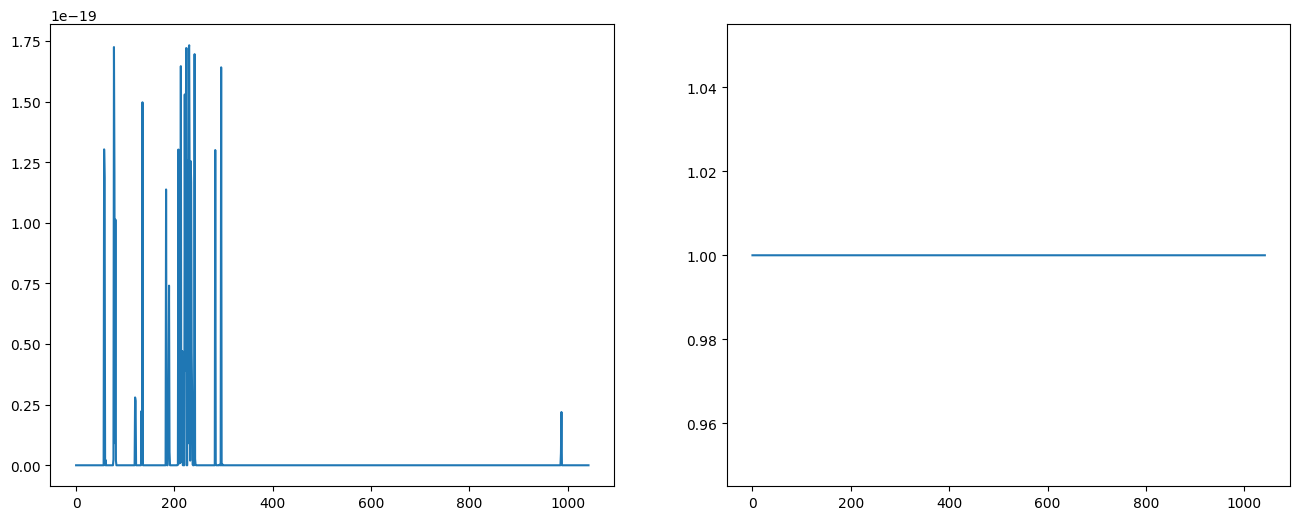


14 22.179597783730856
[0.01566273 0.01443609] [1.34442683e-05 1.56805341e-03] [[5.88309197e-04 9.99411691e-01]
 [3.41798019e-21 1.00000000e+00]] [0. 1.]



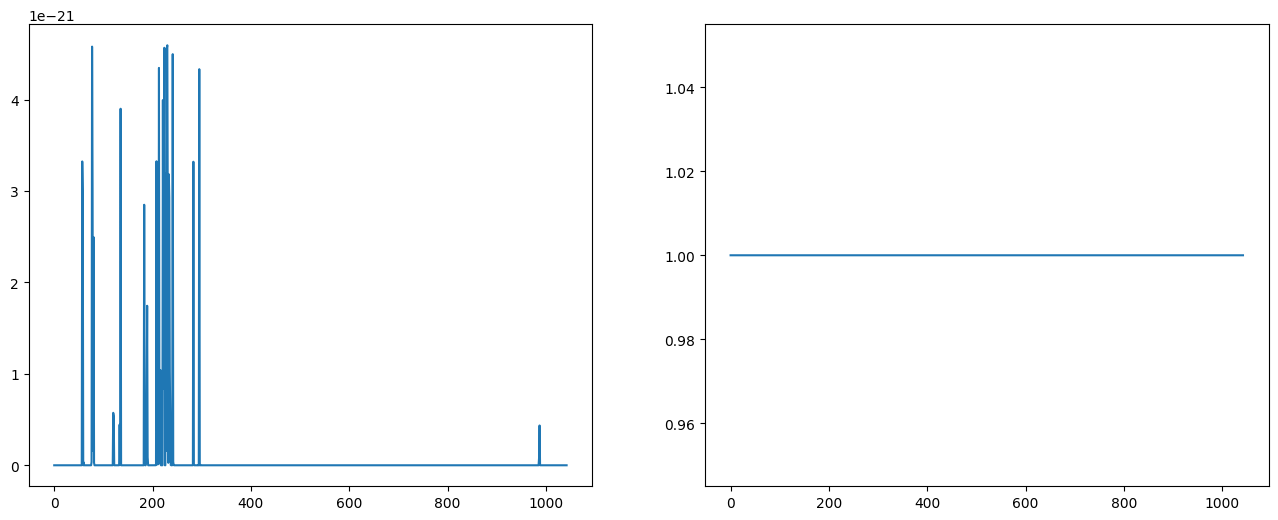


15 7.9083603777114995
[0.01566279 0.01443609] [1.26233332e-05 1.56805341e-03] [[1.92891178e-04 9.99807109e-01]
 [8.57954358e-23 1.00000000e+00]] [0. 1.]



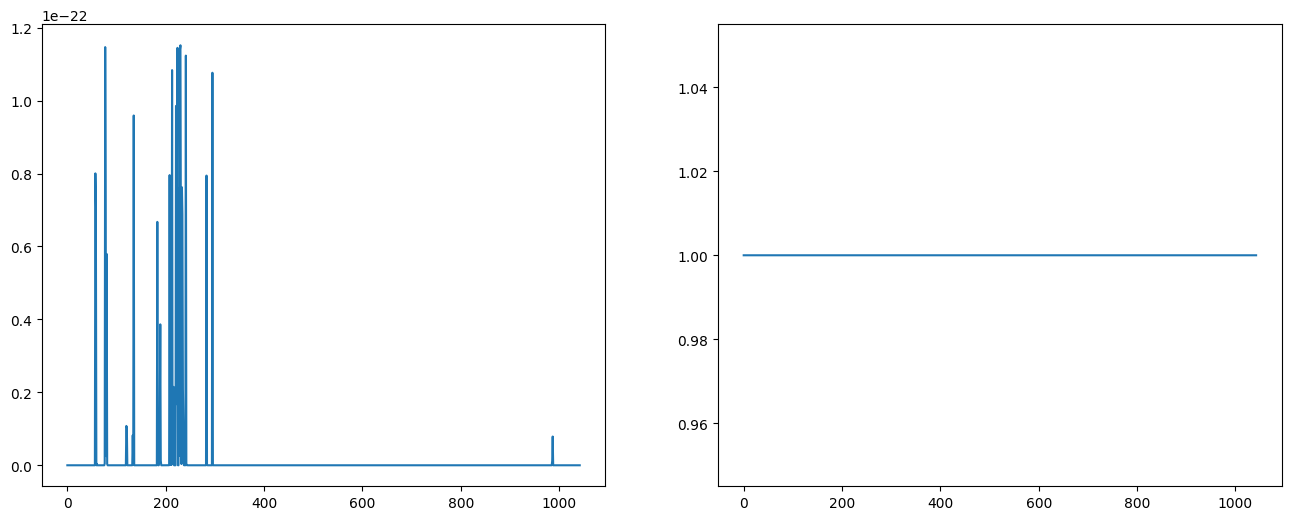


16 2.651110965648869
[0.0156629  0.01443609] [1.19047868e-05 1.56805341e-03] [[6.03356300e-05 9.99939664e-01]
 [2.03732037e-24 1.00000000e+00]] [0. 1.]



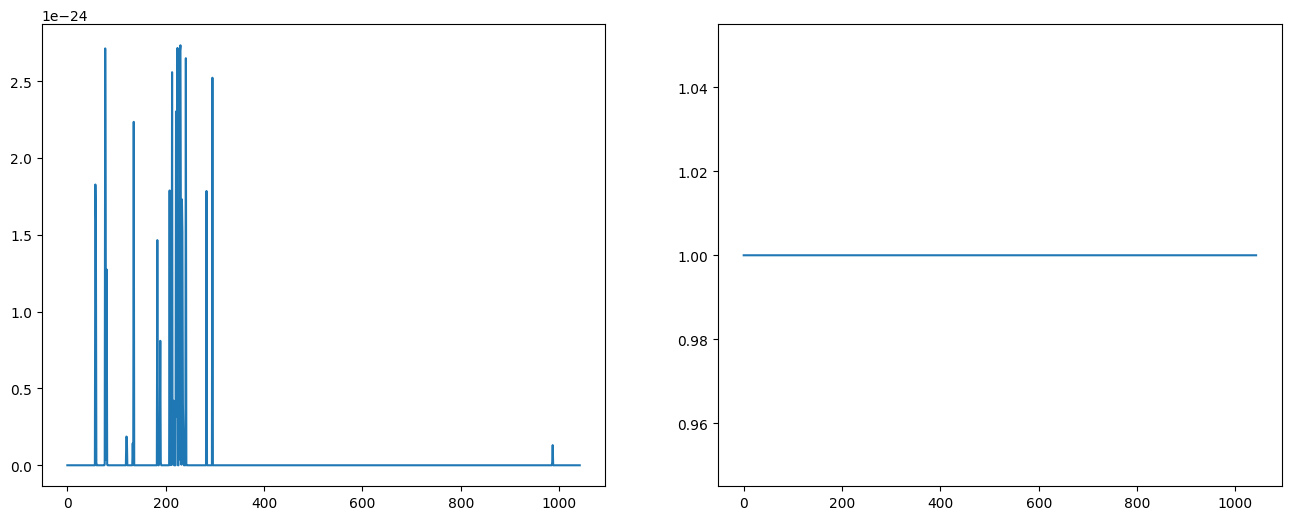


17 0.8435795221117784
[0.01566304 0.01443609] [1.12846829e-05 1.56805341e-03] [[1.81566539e-05 9.99981843e-01]
 [4.59176544e-26 1.00000000e+00]] [0. 1.]



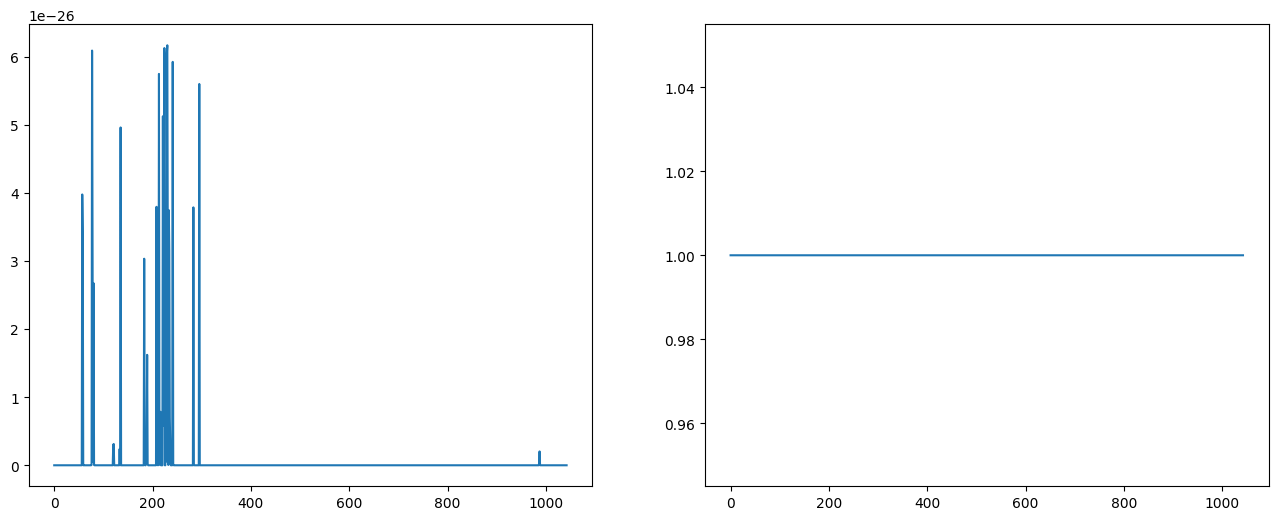


18 0.2571888699657779
[0.0156632  0.01443609] [1.07579754e-05 1.56805341e-03] [[5.29721042e-06 9.99994703e-01]
 [9.86252763e-28 1.00000000e+00]] [0. 1.]



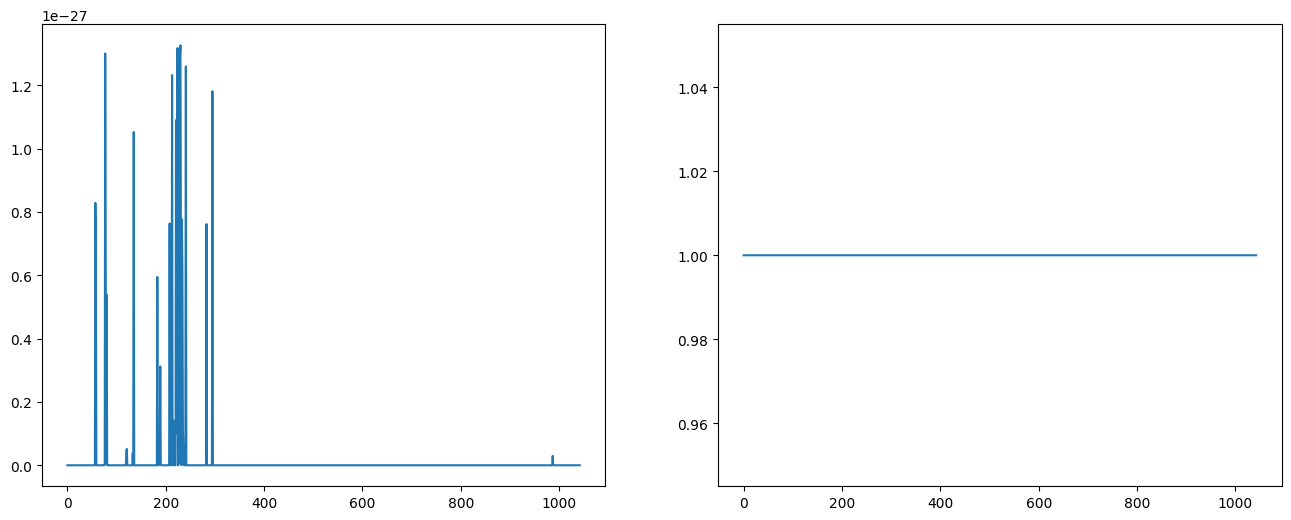


19 0.07577392664995185
[0.01566339 0.01443609] [1.03177555e-05 1.56805341e-03] [[1.50851409e-06 9.99998491e-01]
 [2.02825603e-29 1.00000000e+00]] [0. 1.]



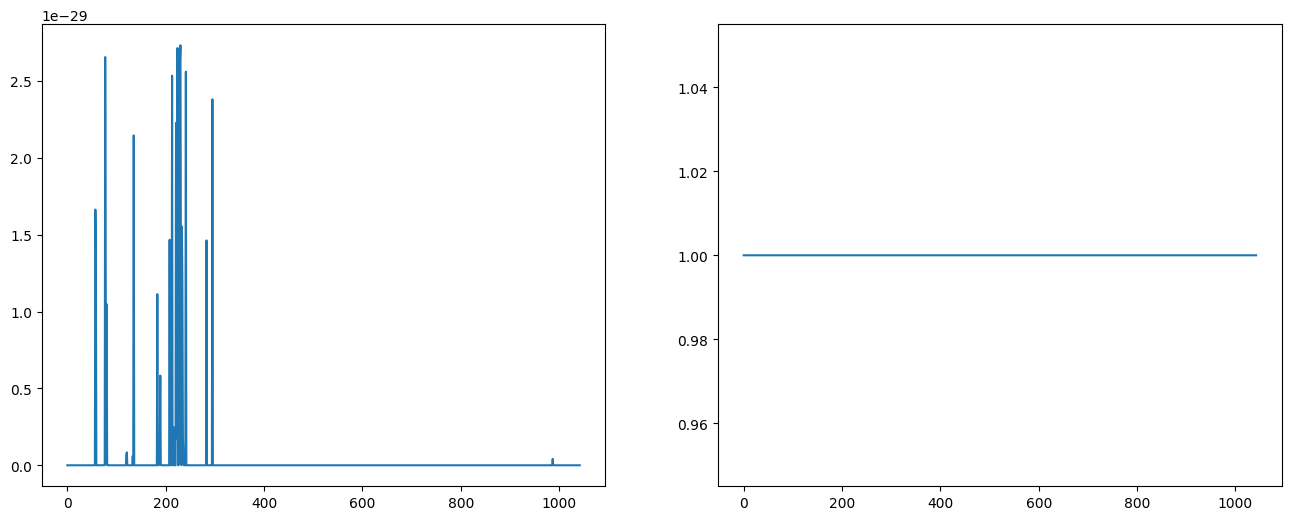


20 0.021735070405743084
[0.01566358 0.01443609] [9.95478175e-06 1.56805341e-03] [[4.21760568e-07 9.99999578e-01]
 [4.01422314e-31 1.00000000e+00]] [0. 1.]



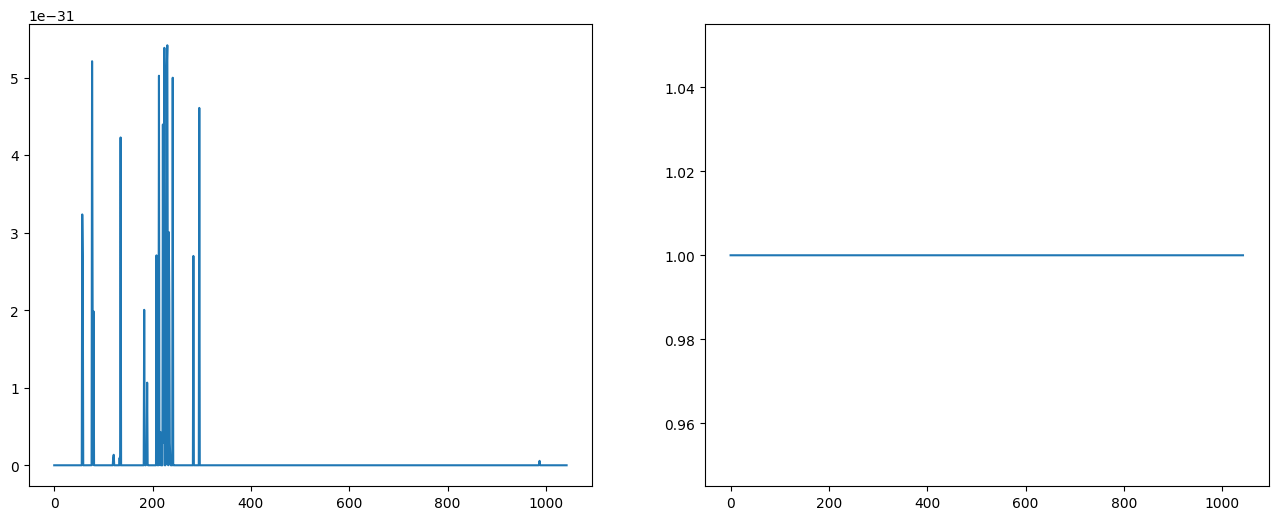


21 0.006108384422488975
mu: [0.01566379 0.01443609], sigma: [9.65783140e-06 1.56805341e-03], TransitionMatrix: [[1.16341347e-07 9.99999884e-01]
 [7.68573261e-33 1.00000000e+00]], PiHat: [0. 1.]


In [35]:
for ite in range(0, itemax):
    print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)

    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, Rub_Usd
    )
    xi_prob_T = backward_alg(
        xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, Rub_Usd
    )
    print("")
    plt.subplot(1, 2, 1)
    plt.plot(xi_prob_T[:, 0])
    plt.subplot(1, 2, 2)
    plt.plot(xi_prob_T[:, 1])
    fig = plt.gcf()
    fig.set_size_inches(16, 6)
    plt.show()
    print("")

    # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(0, N):
            for ss2 in range(0, N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )
    # M-step
    mu_hat1, sigma_hat1, P_hat1, pi_hat1 = M_step_func(xi_prob_T, P_hat_T, N, T, Rub_Usd)

    diff = np.zeros((4))
    diff[0] = np.sum(np.absolute(mu_hat1 - mu_hat0)) / (np.min(mu_hat0) + itetol * 1e-2)
    diff[1] = np.sum(np.absolute(sigma_hat1 - sigma_hat0)) / (
        np.min(sigma_hat0) + itetol * 1e-2
    )
    diff[2] = np.sum(np.absolute(np.subtract(P_hat1, P_hat0))) / (
        np.min(P_hat0) + itetol * 1e-2
    )
    diff[3] = np.sum(np.absolute(pi_hat1 - pi_hat0)) / (np.min(pi_hat0) + itetol * 1e-2)

    print(ite, np.max(diff))

    if np.max(diff) > itetol:
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = mu_hat1, sigma_hat1, P_hat1, pi_hat1
    else:

        print(f"mu: {mu_hat1}, sigma: {sigma_hat1}, TransitionMatrix: {P_hat1}, PiHat: {pi_hat1}")
        break

## **Different Standard Deviation, Constant Mean**

In [36]:
# Initialize parameters
T = len(Rub_Usd)
N = 2

# SET INITIAL GUESSES

mu_hat0 = Rub_Usd.mean()
sigma_hat0 = [regime1_sd, regime2_sd] * np.ones((N))
P_hat0 = np.zeros((N, N))

P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 1 - P_hat0[0, 0]
P_hat0[1, 1] = 0.7
P_hat0[1, 0] = 1 - P_hat0[1, 1]

pi_hat0 = [0.5, 0.5] * np.ones((N))
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-2

print(P_hat0)

[[0.75 0.25]
 [0.3  0.7 ]]


The functions have been modified to take into consideration the fact that the mean varies while the standard deviation remains constant.

In [37]:
def M_step_func(xi_prob, sigma_hat_prev, P, N, T, Y):  #
    sigma_hat = np.zeros((N))
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros((N))

    xi_y_sigma = np.zeros_like((N))
    xi_sigma = np.zeros((N))
    for ss in range(0, N):
        xi_y_sigma = np.dot(xi_prob[:, ss], Y) / sigma_hat_prev[ss]
        xi_sigma[ss] = np.sum(xi_prob[:, ss]) / sigma_hat_prev[ss]
    mu_hat = np.sum(xi_y_sigma) / np.sum(xi_sigma)

    for ss in range(0, N):
        xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat) ** 2)
        sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5

        for ss2 in range(0,N):
              P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(
                P[ss, :, 1:]
            )
        pi_hat[ss] = xi_prob[0, ss]
    return mu_hat, sigma_hat, P_hat, pi_hat

def forward_alg(pi_hat0, N, T, P, mu, sigma, Y):
    xi_prob_t = np.zeros((T, N))
    xi_prob_t1 = np.zeros((T, N))

    # Case t=1
    y_like = likelihood(pi_hat0, mu, sigma, Y[0])
    for ss in range(0, N):
        phi = np.zeros((N))
        for ss2 in range(0, N):
            phi[ss2] = norm.pdf((Y[0] - mu) / sigma[ss2])
    xi_prob_t[0, :] = np.multiply(pi_hat0, phi) / y_like
    for ss in range(0, N):

        print(P)
        xi_prob_t1[0, ss] = np.dot(P[:, ss], xi_prob_t[0, :])

    for tt in range(1, T):
        y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
        for ss in range(0, N):
            phi = np.zeros((N))
            for ss2 in range(0, N):
                phi[ss2] = norm.pdf((Y[tt] - mu) / sigma[ss2])
        xi_prob_t[tt, :] = np.multiply(xi_prob_t1[tt - 1, :], phi) / y_like
        for ss in range(0, N):
            xi_prob_t1[tt, ss] = np.dot(P[:, ss], xi_prob_t[tt, :])

    return xi_prob_t, xi_prob_t1

**Simulation**

mu: 0.014436088182414274, sigma: [2.02100199e-05 1.56805342e-03], phat0: [[9.41577321e-68 1.00000000e+00]
 [9.35664885e-73 1.00000000e+00]], [9.73991353e-07 9.99999026e-01]
[[9.41577321e-68 1.00000000e+00]
 [9.35664885e-73 1.00000000e+00]]
[[9.41577321e-68 1.00000000e+00]
 [9.35664885e-73 1.00000000e+00]]


<ipython-input-37-5bb699a2f105>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phi[ss2] = norm.pdf((Y[0] - mu) / sigma[ss2])
<ipython-input-37-5bb699a2f105>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phi[ss2] = norm.pdf((Y[tt] - mu) / sigma[ss2])


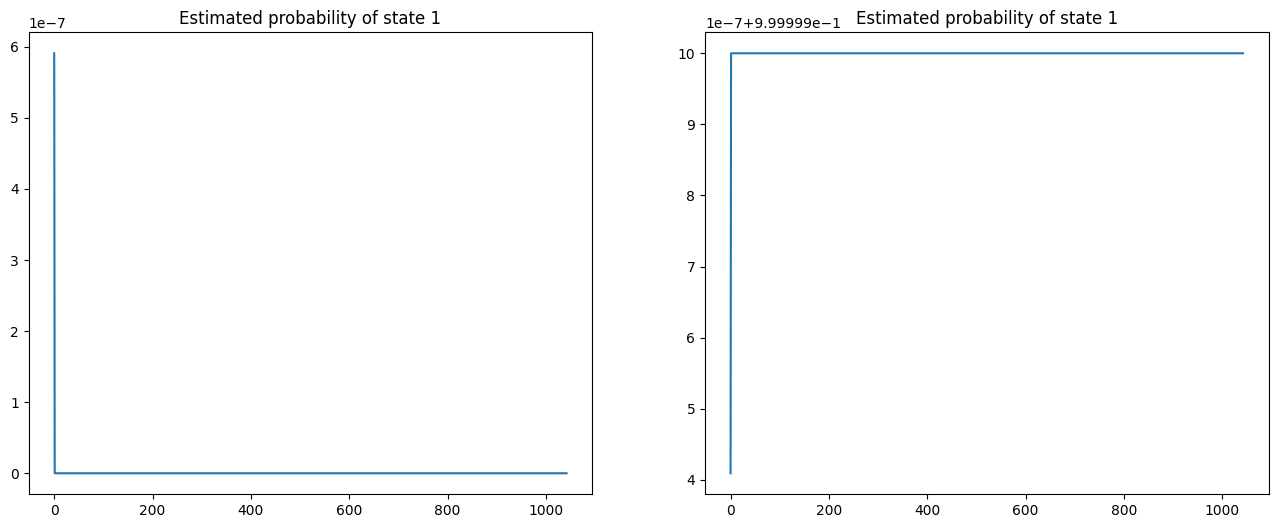


0 0.007589804751195421
mu: 0.014436088593886225, sigma: [2.02096084e-05 1.56805341e-03], TransitionMatrix: [[4.29468366e-71 1.00000000e+00]
 [1.60237183e-75 1.00000000e+00]], PiHat: [5.90804913e-07 9.99999409e-01]


<ipython-input-37-5bb699a2f105>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5


In [53]:
for ite in range(0, itemax):
    print(f"mu: {mu_hat0}, sigma: {sigma_hat0}, phat0: {P_hat0}, {pi_hat0}")

    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, Rub_Usd
    )
    xi_prob_T = backward_alg(
        xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, Rub_Usd
    )

    print("")
    plt.subplot(1, 2, 1)
    plt.plot(xi_prob_T[:, 0])
    plt.title("Estimated probability of state 1")
    plt.subplot(1, 2, 2)
    plt.plot(xi_prob_T[:, 1])
    plt.title("Estimated probability of state 1")
    fig = plt.gcf()
    fig.set_size_inches(16, 6)
    plt.show()
    print("")

    # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(0, N):
            for ss2 in range(0, N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )
    # M-step
    mu_hat1, sigma_hat1, P_hat1, pi_hat1 = M_step_func(xi_prob_T, sigma_hat0, P_hat_T, N, T, Rub_Usd)

    diff = np.zeros((4))
    diff[0] = np.sum(np.absolute(mu_hat1 - mu_hat0)) / (np.min(mu_hat0) + itetol * 1e-2)
    diff[1] = np.sum(np.absolute(sigma_hat1 - sigma_hat0)) / (
        np.min(sigma_hat0) + itetol * 1e-2
    )
    diff[2] = np.sum(np.absolute(np.subtract(P_hat1, P_hat0))) / (
        np.min(P_hat0) + itetol * 1e-2
    )
    diff[3] = np.sum(np.absolute(pi_hat1 - pi_hat0)) / (np.min(pi_hat0) + itetol * 1e-2)

    print(ite, np.max(diff))

    if np.max(diff) > itetol:
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = mu_hat1, sigma_hat1, P_hat1, pi_hat1
    else:
        print(f"mu: {mu_hat1}, sigma: {sigma_hat1}, TransitionMatrix: {P_hat1}, PiHat: {pi_hat1}")
        break

# **References**

- Hamilton, James D. Time Series Analysis. Princeton University Press, 1994. (see Chapter 22: "Modeling Time Series with Changes in Regime")


- Polyanskiy, Y. ”Fundamentals of Probability.” Fall 2018. Massachusetts Institute of Technology: MIT
OpenCouseWare, https://ocw.mit.edu/. (Check the Lecture Notes on Markov processes)

- Sutton, Richard S., and Andrew G. Barto. Reinforcement Learning: An Introduction. MIT Press, 2018. (Check
the introductory chapters)
